In [4]:
%%html

<h2>Classification</h2> 
This section is based on the following chapters from two books:
<br/>
<a href='https://github.com/ageron/handson-ml3/blob/main/03_classification.ipynb'>https://github.com/ageron/handson-ml3/blob/main/03_classification.ipynb</a>
<br/>
<a href='https://github.com/gedeck/practical-statistics-for-data-scientists/blob/master/python/notebooks/Chapter%205%20-%20Classification.ipynb'>https://github.com/gedeck/practical-statistics-for-data-scientists/blob/master/python/notebooks/Chapter%205%20-%20Classification.ipynb</a>

In [5]:
%%html

<h3>Getting  the mnist data in scikit-learn</h3> 

In [6]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', as_frame=False)

/usr/local/lib/python3.11/dist-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [7]:
# fetch_openml by default returns the data in pandas format, but mnist dataset contains images, and pandas format is not ideal in this case. 
# So by specifying the as_frame= False, it will returns the numpy data instead of pandas DF.
mnist_pd = fetch_openml('mnist_784', as_frame=True)

In [8]:
mnist_pd['data'].head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
X, y = mnist.data, mnist.target

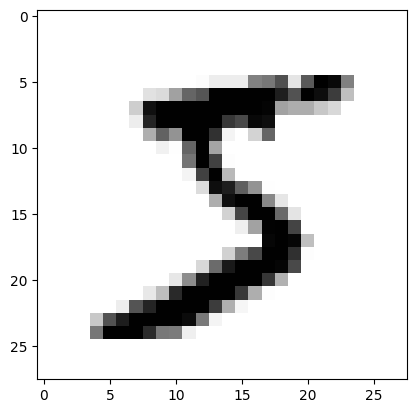

label: 5


In [10]:
import matplotlib.pyplot as plt
def show_image(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap='binary')

show_image(X[0])
plt.show()
print(f"label: {y[0]}")

In [11]:
# Non-stratified train-test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# We can do the stratification by passing stratify argument


In [13]:
%%html

<h3>Performance Measures</h3> 

In [14]:
# Let's simplify the problem by considering a binary classification
# let's try to identify number 5 or non-5

y_train_5 = (y_train == '5')  # True for all 5s, False for all other digits
y_test_5 = (y_test == '5')

from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)


SGDClassifier(random_state=42)

In [15]:
result  = sgd_clf.predict(X_test)

In [16]:
%%html

<h4>Measuring accuracy using cross validation</h4> 

In [17]:
from sklearn.model_selection import cross_val_score
rmse = cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')
rmse

array([0.97192907, 0.96855413, 0.96024858])

In [18]:
# In cross-validation using cross_val_score, no stratification is done and it is expected us to provide the stratified code.
# We can avoid this and get more control in cross-validation using the statifiedKFold method as shown below

#from sklearn.model_selection import StratifiedKFold
#from sklearn.base import clone

#skfolds = StratifiedKFold(n_splits=3)  # add shuffle=True if the dataset is not
                                       # already shuffled
#for train_index, test_index in skfolds.split(X_train, y_train):
#    X_train_folds = X_train[train_index]
#    y_train_folds = y_train_5[train_index]
#    X_test_fold = X_train[test_index]
#    y_test_fold = y_train_5[test_index]
#    fit a classifier X_train_folds and y_train_folds
#    get y_pred using X_test_fold
#    n_correct = sum(y_pred == y_test_fold)
#    print(n_correct / len(y_pred))

In [19]:
# It's better to do everything in the pipeline as below. For cross_val|_Score, we fo not need pipeline though.

In [20]:
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline

sgd_clf = SGDClassifier(random_state=42)
pipeline = Pipeline([
    ("SGD", sgd_clf),
])
pipeline.fit(X_train, y_train_5)

Pipeline(steps=[('SGD', SGDClassifier(random_state=42))])

In [21]:
result  = pipeline.predict(X_test)
result

array([False, False,  True, ..., False, False, False])

In [22]:
%%html

<h4>Confusion matrices</h4> 
It is a great performance metric, especially in the case of a class imbalance problem.
<br/>
<b>Confusion matrix for a binary response</b>
<img src='images/confusion_matrix.png' width=400 />

In [23]:
# Rows represent true responses and columns represent the predicted responses
# True +ve = both true response and predicted response is +ve
# True -ve = both true response and predicted response is -ve
# False +ve (type 1 error) = it's wrongly predicted as +ve
# False -ve (type 2 error) = it's wrongly predicted as -ve 

# Precision is in the total +ve prediction responses, how many +ve prediction responses are predicted correctly. 
# It measures the accuracy of the +ve prediction.
# Precision = TP/(TP+FP)

# Recall is in the total +ve true responses, how many +ve true responses are predicted accurately. It is also called sensitivity / true +ve rate
# It is the ratio of +ve responses correctly classified as +ve responses
# Recall = TP/(TP+FN)

# Opposite to recall.
# It is the ratio of -ve responses that are correctly classified as -ve responses
# Specificity = TN/(TN+FP)

# We can also calculate the accuracy as TP+TN is the total number of accurate predictions. 
# Dividing it by the total number of precision, we can get the accuracy
# Accuracy =(TP+TN)/total 


#Precision/recall example explanation
# In the case, of fraud detection in an insurance claim example, reducing the FP is more important than FN. 
# FP means predicting as +ve instead of true -ve response. 
# It means that a customer who is not a fraud can be classified as fraud which is going to be a reputational issue 
# for the brand which has a much more negative  impact than the loss accumulated through the FN.
# So reducing the FP is the key focus. If we reduce the FP, the precision will increase as per the formula. 

# In the case of a cancer detection algorithm from the image, reducing FN is more important than FP.
# FN means predicting as -ve instead of true +ve response. 
# It means that a patient who has cancer will be identified as not cancerous. 
# This has more impact than detecting the non-cancerous patient as cancerous(FP).
# So reducing the FN is important. If we reduce the FN, the recall will increase as per the formula.


In [24]:
# We can implement that now, cross_val_Score give the evaluation_metrics,WHat we need here is the predictions with cross validation, 
# So we can use cross_val_predict
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [25]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train_5, y_train_pred)

TN = cm[0][0]
FP = cm[0][1]

In [26]:
%%html

Position of +ve and -ve responses are different in sklearn compared to what we showed in the above picture. But the concept is same.\
<img src="images/sk_learn_confusion_matrix.png" width=400>

In [27]:
# We can get the precision and recall score using sklearn
from sklearn.metrics import precision_score, recall_score, accuracy_score

# It measures the accuracy of +ve predicted response
precision_score(y_train_5, y_train_pred)

0.8515332009706597

In [28]:
# Sensitivity/ true +ve rate/ model's ability to predict +ve response
recall_score(y_train_5, y_train_pred)

0.7658730158730159

In [29]:
# Specifity
result= TN/(TN+FP)
result

0.9867935635792778

In [30]:
# accuracy
accuracy_score(y_train_5, y_train_pred)

0.9669107142857143

In [31]:
# F1 score computes the harmonic meaning between precision & recall
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.8064347644416588

In [32]:
# The F1 score favours the classifiers with similar precision and recall. 
# Unfortunately, increasing the precision reduces the recall and vice versa. 
# This is called precision/recall trade-off 

In [33]:
%%html

<h4>Precision/recall trade off</h4> 
The +ve precision and -ve prediction are determined if the prediction score(probability) is greater than the threshold being +ve prediction,
otherwise a -ve prediction.
<br/>
SGC classifier does not let us change the threshold directly, it does give the access to descison score.
<br/>


In [35]:
some_digit = X[0]
y_score = sgd_clf.decision_function([some_digit])
y_scores

array([-372.88017823])

In [36]:
# just shows that y_scores > 0 produces the same result as calling predict()
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [40]:
threshold = -300
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [49]:
# How do we determine which theshold to use?
#1. use cross_val_predict() and pass fecision_function as method argument value
#2. With these scores, use precison_recall_curve to compute precision & recall for all threshold
#3. Then plot the curve using matplotlib with threshold we slected earlier

y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method='decision_function')

In [50]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

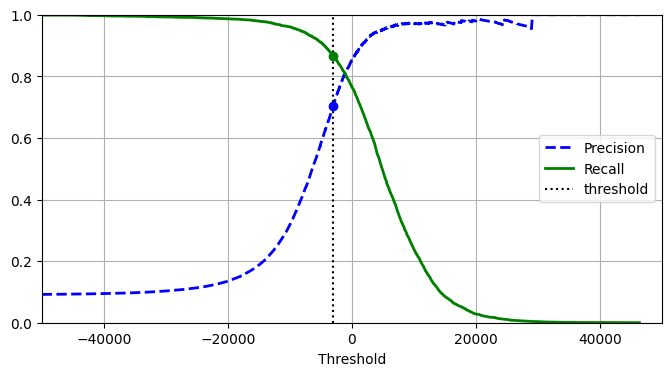

In [66]:
plt.figure(figsize=(8, 4))  # extra code – it's not needed, just formatting
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")

# extra code – this section just beautifies and saves Figure 3–5
idx = (thresholds >= threshold).argmax()  # first index ≥ threshold
plt.plot(thresholds[idx], precisions[idx], "bo")
plt.plot(thresholds[idx], recalls[idx], "go")
plt.axis([-50000, 50000, 0, 1])
plt.grid()
plt.xlabel("Threshold")
plt.legend(loc="center right")

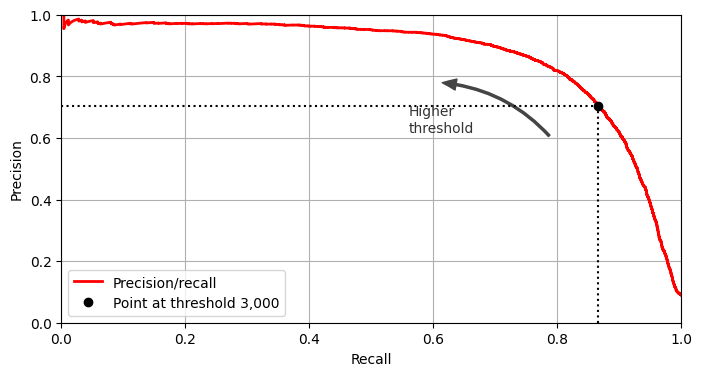

In [69]:
import matplotlib.patches as patches  # extra code – for the curved arrow

# We can plot precision/recall curve
plt.figure(figsize=(8, 4))  # extra code – it's not needed, just formatting
plt.plot(recalls,precisions, "r-", label="Precision/recall", linewidth=2)

# extra code – just beautifies and saves Figure 3–6
plt.plot([recalls[idx], recalls[idx]], [0., precisions[idx]], "k:")
plt.plot([0.0, recalls[idx]], [precisions[idx], precisions[idx]], "k:")
plt.plot([recalls[idx]], [precisions[idx]], "ko",
         label="Point at threshold 3,000")
plt.gca().add_patch(patches.FancyArrowPatch(
    (0.79, 0.60), (0.61, 0.78),
    connectionstyle="arc3,rad=.2",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(0.56, 0.62, "Higher\nthreshold", color="#333333")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")

In [ ]:
# The aove diagram shows when recall increases precision decreases and vice versa.

In [70]:
precisions >= 0.90

array([False, False, False, ...,  True,  True,  True])

In [72]:
# Suppose we are aiming to get a prediction with 90% precision. 
# We can either use the above picture to make the decision or use np.argmax 
idx_for_90_precision = (precisions >= 0.90).argmax()
# This will return the array index with the highest recall possible for >=90% precisions.
threshold_for_90_precision = thresholds[idx_for_90_precision]
threshold_for_90_precision 

1583.5206905024331

In [74]:
y_train_pred_90 = (y_scores > threshold_for_90_precision)
y_train_pred_90

array([ True, False, False, ..., False, False, False])

In [75]:
precision_score(y_train_5, y_train_pred_90)

0.8999742864489586

In [76]:
recall_score(y_train_5, y_train_pred_90)

0.6944444444444444

In [ ]:
%%html

<h4>ROC curve</h4>
Receiver operating characteristics is another tool used in binary classifier.
<br/>
It's very similar to precion/recall curve, bute hre uses true positive rate(recall) vs false positive rate(FPR)
<br/>
FPR is a ratio of negative responses incorrectly classified as +ve. If the FPR decreases, precision increases.
<br/>
FPR is calculated by 1-specifity(ratio of -ve responses that are correctly classified as -ve responses)

In [81]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)
idx_for_threshold_at_90 = (thresholds <= threshold_for_90_precision).argmax()
tpr_90, fpr_90 = tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]


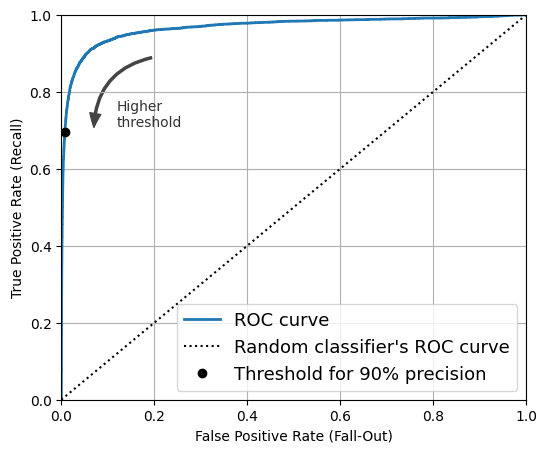

In [83]:
plt.figure(figsize=(6, 5))  
plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
plt.plot([fpr_90], [tpr_90], "ko", label="Threshold for 90% precision")

#extra code – just beautifies and saves Figure 3–7
plt.gca().add_patch(patches.FancyArrowPatch(
    (0.20, 0.89), (0.07, 0.70),
    connectionstyle="arc3,rad=.4",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(0.12, 0.71, "Higher\nthreshold", color="#333333")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)


In [85]:
# The above picture will give you an idea about why when precision increases recall decreases and vice versa.
# My intution here is that if false +ve increases precision decreases as per precision formula(TP/(TP+FP)).
# When we have a higher false +ve rate (it means it will reduce the recall) that will increase the recall.
# It means the higher the false +ve rate, the higher the recall, thus reducing the precision.

In [88]:
%%html
<h4>Area Under Curve(AUC)</h4>
One way to compares the classifier using area under the curve. The larger the are under curve, the more effective the classifier. 
The perfect classifier will have AUC equal to one, where a purely random classifier will have auc equal to 0.5

In [90]:
from sklearn.metrics import roc_auc_score

In [92]:
auc_score = roc_auc_score(y_train_5, y_scores)
auc_score

0.9672937302210262

In [93]:
# Lets compare two classifiers: RandomForestClassifier and SGDClassifier
from sklearn.ensemble import RandomForestClassifier

In [97]:
forest_clf = RandomForestClassifier(random_state=42)
# it has no decision_function method
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method='predict_proba')

In [98]:
y_probas_forest

array([[0.24, 0.76],
       [0.99, 0.01],
       [0.98, 0.02],
       ...,
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.94, 0.06]])

In [102]:
# the second column has the probability for +ve classes
y_scores_f = y_probas_forest[:,1]

In [103]:
precisions_f, recalls_f, thresholds_f = precision_recall_curve(y_train_5, y_scores_f)

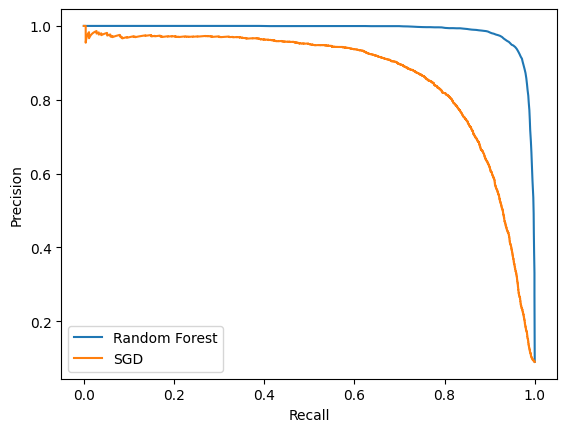

In [108]:
plt.plot(recalls_f, precisions_f, label="Random Forest")
plt.plot(recalls, precisions, label="SGD")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()

In [112]:
# By just looking at the image, we can conclude that Random Forest is better than SGD.
# We can compute the AUC score as below as well:
print(f"AUC score of Random Forest:{roc_auc_score(y_train_5, y_scores_f)}")
print(f"AUC score of SGD:{roc_auc_score(y_train_5, y_scores)}")

AUC score of Random Forest:0.9982151267100247
AUC score of SGD:0.9672937302210262


In [116]:
%%html
<h3>Multi class classification</h3>
Binary classifier distinguishes between two classes, multiclass classifiers can distinguish between more than two classes. For example, 
predicting the 1 to 10 numbers from mnist image dataset is an example of multiclass classification.
<br/>
In Multiclass classification, confusion matrix will have all the classes of true & predicted responses. Mnist confusion matrc is shown below:
<img src="images/confusion_matrix_multiclass.png" width=400 />

In [118]:
%%html

There are two approaches in calculation multiclass classification metrics: macro averaging and micro averaging.
<br/>
<b>Macro Averaging</b>
<img src="images/macro_averaging.png" width=400 />
<br/>
<b>Micro Averaging</b>
<img src="images/micro_averaging.png" width=400 />
<br/>
Ref: https://medium.com/data-science-in-your-pocket/calculating-precision-recall-for-multi-class-classification-9055931ee229


In [123]:
%%html
Macro-averaging is to be preferred over micro-averaging in case of imbalanced classes (which is almost always the case), because it weighs each of the classes equally and isn’t influenced by the number of examples of each class.

In [125]:
%%html
<h3>Multi label classification</h3>
Even though there are multiple classes, in multiple classifications, each instance is assigned to one class only. 
Multi-label classification has multiple labels assigned to each instance.

<br/>
We can use the same technique used in multi-class classification to compute the precision and recall metrics.

In [14]:
%%html
<h3>Challenges for imbalanced data</h3>
<img src="images/class_imbalance.jpg" width=400 />
1. Insufficient signal for your model to learn to detect the minority classes
2. It will be easier for the model to get stuck in a non-optimal solution

<h3>Strategies for imbalanced data</h3>
1. Using the right Evaluation metric: Precison, recall, and f1 over accuracy
<br/>
2. Resampling: 
<img src="images/resampling.jpg" width=400 />
<b>Undersampling</b>
<br/>
If we have enough data, one strategy to undersample the prevalent class. The basic idea in undersampling is that
the data for the dominant class has many redundant records.
<br/>
<b>Oversample</b>
<br/>
Instead of downsampling the dominant class, we can upsample the rarer class by drawing additional rows with replacement(bootstrapping).
<br/>
<br/>
Undersampling runs the risk of losing important data. Oversampling runs the risk of overfitting the training data. 
<br/>
Two approaches to this are two-phase learning and dynamic sampling. 
<br/>
In two-phase learning, we first train the model on the resampled data. 
The resampled data can be achieved by randomly undersampling large classes until each class has only N instances. 
Then we can finetune the model on the original data.

In dynamic sampling, oversample the low-performing classes and undersample the high-performing classes during the training process. 
<br/>
<br/>
3. We can change the loss function to accommodate the imbalanced class problem.
<br/>
4. Data generation

In [21]:
%%html
<h3>Handling the lack of labels</h3>
<img src="images/lack_labels_techniques.jpg" width=400/>
<br/>
1. Weak supervision: it relies on experts to create a label function that can be used to label data. Snorkel AI is the company that is leading in this approach.
<img src="images/weak_supervision.jpg" width=400 />
2. Semi-supervision: start training the data on existing labels and use this model to make predictions for unlabeled data.
<br/>
3. Transfer learning: finetune with a small number of labels on a pre-trained model.
<br/>
4. Active learning: labels the data samples that are most useful to your model.